In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import graphviz 
import re
import os
import random

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, svm
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.externals.six import StringIO
from IPython.display import SVG

%matplotlib inline


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Load the dataframe:

In [2]:
credits = pd.read_csv('german_credit_data.csv')
credits.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV


### Dataframe editing:

In [3]:
credits = credits.drop(['Unnamed: 0'],1)
credits.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV


In [4]:
"""Print out the unique elements pf each column to detect NaNs:"""
print(np.unique(credits.Age.values))
print(np.unique(credits.Sex.values))
print(np.unique(credits.Job.values))
print(np.unique(credits.Housing.values))
print(np.unique(credits['Credit amount'].values))
print(np.unique(credits.Duration.values))
print(np.unique(credits.Purpose.values))

# For 'Saving accounts' and 'Checking account' gives the following
# TypeError: '<' not supported between instances of 'str' and 'float'

[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 70 74 75]
['female' 'male']
[0 1 2 3]
['free' 'own' 'rent']
[  250   276   338   339   343   362   368   385   392   409   426   428
   433   448   454   458   484   518   522   571   585   590   601   609
   618   625   626   629   639   640   652   654   660   662   666   672
   674   682   683   684   685   691   697   700   701   707   708   709
   717   719   727   730   731   741   745   750   753   754   759   760
   763   766   776   781   783   790   795   797   802   804   806   836
   841   846   860   866   874   882   884   886   888   894   900   902
   907   909   915   918   926   929   930   931   932   936   937   939
   947   950   951   958   959   960   975   976   983   996   999  1007
  1024  1028  1037  1038  1042  1047  1048  1049  1050  1053  1055  1056
  1068  1076  1082  1092  1098  1101  1103  1107  1108  1

In [5]:
list2 = []
for i in credits['Checking account']:
    if i in list2:
        pass
    else:
        list2.append(i)
list2

['little', 'moderate', nan, 'rich']

In [6]:
list3 =[]
for i in credits['Saving accounts']:
    if i in list3:
        pass
    else:
        list3.append(i)
list3

[nan, 'little', 'quite rich', 'rich', 'moderate']

In [7]:
"""There are NaN only in the Saving and Checking account columns
I could have used credits.isnull() but it does not tell me which columns"""
#credits.isnull()

'There are NaN only in the Saving and Checking account columns\nI could have used credits.isnull() but it does not tell me which columns'

In [8]:
credits.fillna('NA', inplace=True)
credits.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NA,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NA,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [9]:
list4 =[]
for i in credits['Checking account']:
    if i in list4:
        pass
    else:
        list4.append(i)
list4

['little', 'moderate', 'NA', 'rich']

In [10]:
list5 =[]
for i in credits['Saving accounts']:
    if i in list5:
        pass
    else:
        list5.append(i)
list5

['NA', 'little', 'quite rich', 'rich', 'moderate']

In [11]:
credits.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NA,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NA,2096,12,education


In [12]:
le1 = preprocessing.LabelEncoder()
credits['Sex'] = le1.fit_transform(credits['Sex'])
le2 = preprocessing.LabelEncoder()
credits['Housing'] = le2.fit_transform(credits['Housing'])
le3 = preprocessing.LabelEncoder()
credits['Saving accounts'] = le3.fit_transform(credits['Saving accounts'])
le4 = preprocessing.LabelEncoder()
credits['Checking account'] = le4.fit_transform(credits['Checking account'])

In [13]:
print ("Dataset Length: ", len(credits)) 
print ("Dataset Shape: ", credits.shape) 
credits.head()

Dataset Length:  1000
Dataset Shape:  (1000, 9)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,radio/TV
1,22,0,2,1,1,2,5951,48,radio/TV
2,49,1,1,1,1,0,2096,12,education
3,45,1,2,0,1,1,7882,42,furniture/equipment
4,53,1,2,0,1,1,4870,24,car


In [14]:
X = credits.values[:, 0:8] 
y = credits['Purpose'].values

In [15]:
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


### Decision Tree Algorithm

In [16]:
dtc_credits_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=50,min_samples_leaf=1)

In [17]:
dtc_credits_entropy.fit(X, y)
y_pred = dtc_credits_entropy.predict(X)  
#print(np.unique(y_pred))

In [18]:
print(accuracy_score(y, y_pred)*100) # Gini gives the same results
print(classification_report(y, y_pred) )
#classifier.fit(X, y)

100.0
                     precision    recall  f1-score   support

           business       1.00      1.00      1.00        97
                car       1.00      1.00      1.00       337
domestic appliances       1.00      1.00      1.00        12
          education       1.00      1.00      1.00        59
furniture/equipment       1.00      1.00      1.00       181
           radio/TV       1.00      1.00      1.00       280
            repairs       1.00      1.00      1.00        22
    vacation/others       1.00      1.00      1.00        12

           accuracy                           1.00      1000
          macro avg       1.00      1.00      1.00      1000
       weighted avg       1.00      1.00      1.00      1000



In [19]:
"""The values in each class in the prediction-column are very unequally distributed. Do an stratified split"""
credits['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [20]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1234,stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y)

In [49]:
test_credits_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=500,min_samples_leaf=2)
test_credits_entropy.fit(X_test, y_test) ## entropy esta relacionado con pureza
y_pred_test_entropy = test_credits_entropy.predict(X_test)
accuracy_score(y_test, y_pred_test_entropy)*100

80.5

In [50]:
test_credits_gini=DecisionTreeClassifier(criterion="gini",max_depth=500,min_samples_leaf=2)
test_credits_gini.fit(X_test, y_test)  ## gini esta relacionado con error
y_pred_test_gini = test_credits_gini.predict(X_test) 
accuracy_score(y_test, y_pred_test_gini)*100 

77.5

In [23]:
credits_labels = []
for i in credits:
    if i in credits_labels:
        pass
    else:
        credits_labels.append(i)
print(credits_labels)

['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']


In [24]:
credits.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

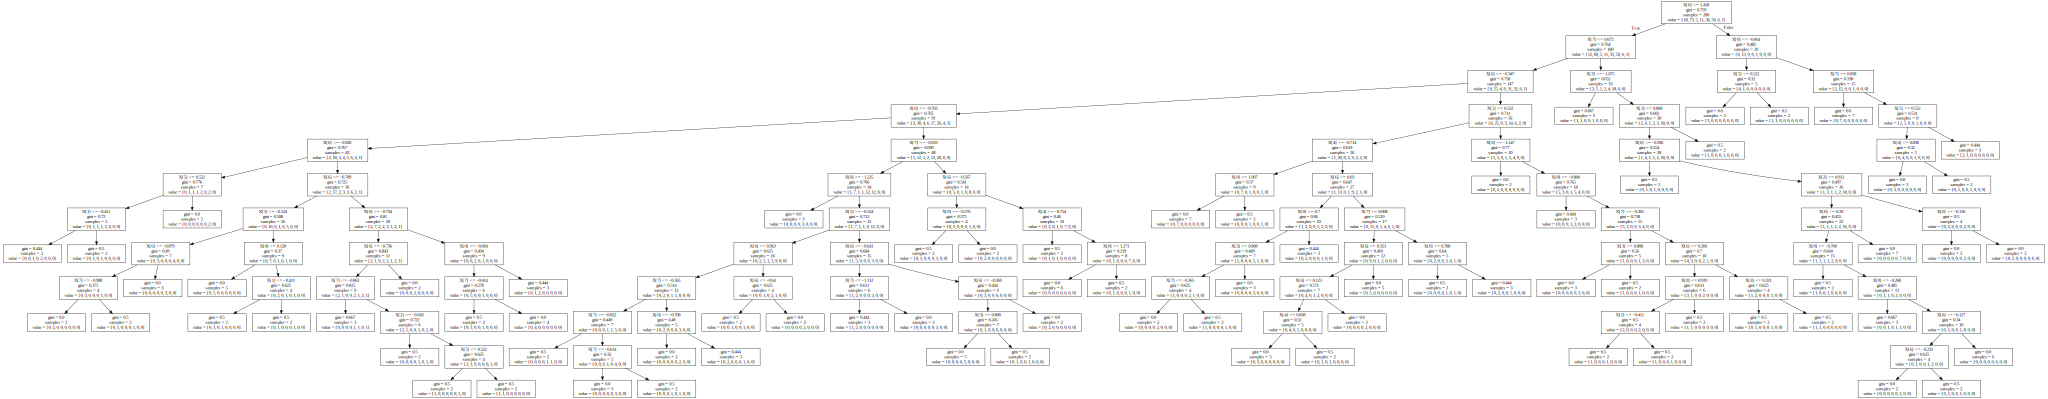

In [53]:
#credits_names = credits.columns
dot_data = StringIO()
filename = "creditsTree.png"
test_credits_gini
# feature = credits.drop(['Purpose'],1).columns
#x = test_credits_gini['Purpose'].unique().tolist()
dot_data = export_graphviz(test_credits_gini)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

### Knearest algorithm

In [26]:
X = credits[['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration']].values  #.astype(float)
X

array([[  67,    1,    2, ...,    1, 1169,    6],
       [  22,    0,    2, ...,    2, 5951,   48],
       [  49,    1,    1, ...,    0, 2096,   12],
       ...,
       [  38,    1,    2, ...,    0,  804,   12],
       [  23,    1,    2, ...,    1, 1845,   45],
       [  27,    1,    2, ...,    2, 4576,   45]])

In [27]:
y = credits['Purpose'].values
y[0:5]

array(['radio/TV', 'radio/TV', 'education', 'furniture/equipment', 'car'],
      dtype=object)

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 2.76645648e+00,  6.70280063e-01,  1.46949180e-01,
        -1.33710455e-01, -1.23139326e+00, -1.04541732e-03,
        -7.45131413e-01, -1.23647786e+00],
       [-1.19140394e+00, -1.49191369e+00,  1.46949180e-01,
        -1.33710455e-01, -1.96609009e-01,  1.04437190e+00,
         9.49816789e-01,  2.24819436e+00],
       [ 1.18331231e+00,  6.70280063e-01, -1.38377145e+00,
        -1.33710455e-01, -1.96609009e-01, -1.04646274e+00,
        -4.16562408e-01, -7.38667543e-01],
       [ 8.31502499e-01,  6.70280063e-01,  1.46949180e-01,
        -2.01695631e+00, -1.96609009e-01, -1.04541732e-03,
         1.63424694e+00,  1.75038404e+00],
       [ 1.53512213e+00,  6.70280063e-01,  1.46949180e-01,
        -2.01695631e+00, -1.96609009e-01, -1.04541732e-03,
         5.66663505e-01,  2.56953092e-01]])

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1234,stratify=y)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4,stratify=y)

In [30]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (850, 8) (850,)
Test set: (150, 8) (150,)


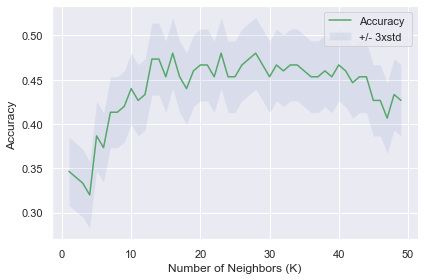

The best test accuracy was with 0.48 with k= 16
Train set Accuracy:  0.4082352941176471


In [31]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  
    knc = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knc.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best test accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knc.predict(X_train)))

### SVM algorithm

In [32]:
credits.dtypes

Age                  int64
Sex                  int64
Job                  int64
Housing              int64
Saving accounts      int64
Checking account     int64
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [33]:
credits.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,radio/TV
1,22,0,2,1,1,2,5951,48,radio/TV
2,49,1,1,1,1,0,2096,12,education
3,45,1,2,0,1,1,7882,42,furniture/equipment
4,53,1,2,0,1,1,4870,24,car


In [34]:
le_Purpose = preprocessing.LabelEncoder()
credits['Purpose'] = le_Purpose.fit_transform(credits['Purpose'])
credits['Purpose'].value_counts()

1    337
5    280
4    181
0     97
3     59
6     22
7     12
2     12
Name: Purpose, dtype: int64

In [35]:
credits['Purpose'].dtypes

dtype('int64')

In [36]:
y = credits['Purpose']
print(type(y))
y [0:5]

<class 'pandas.core.series.Series'>


0    5
1    5
2    3
3    4
4    1
Name: Purpose, dtype: int64

In [37]:
credits['Purpose'].value_counts()

1    337
5    280
4    181
0     97
3     59
6     22
7     12
2     12
Name: Purpose, dtype: int64

In [38]:
Y = np.asarray(credits['Purpose'])
print(type(Y))

<class 'numpy.ndarray'>


In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


In [40]:
clf_rbf = svm.SVC(kernel='rbf', gamma='scale')
clf_rbf.fit(X_train, y_train)
y_predict_rbf = clf_rbf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict_rbf, labels=[0,1,2,3,4,5,6,7])
#print(confusion_matrix(y_test, y_predict_rbf))
print('F1_Score', f1_score(y_test, y_predict_rbf, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict_rbf))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_rbf))
print("Precision:",metrics.precision_score(y_test, y_predict_rbf, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predict_rbf, average='weighted'))
#print (classification_report(y_test, y_predict_rbf))

F1_Score 0.357453122951178
Jaccard 0.41
Accuracy: 0.41
Precision: 0.3431749816581071
Recall: 0.41


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
clf_sigmoid = svm.SVC(kernel='sigmoid', gamma='scale')
clf_sigmoid.fit(X_train, y_train) 
y_predict_sigmoid = clf_sigmoid.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict_sigmoid, labels=[0,1,2,3,4,5,6,7])
#print(confusion_matrix(y_test, y_predict_sigmoid))
print('F1_Score', f1_score(y_test, y_predict_sigmoid, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict_sigmoid))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_sigmoid))
print("Precision:",metrics.precision_score(y_test, y_predict_sigmoid, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predict_sigmoid, average='weighted'))
#print (classification_report(y_test, y_predict_sigmoid))

F1_Score 0.2671329346172113
Jaccard 0.305
Accuracy: 0.305
Precision: 0.2654022545347727
Recall: 0.305


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
clf_linear = svm.SVC(kernel='linear', gamma='scale')
clf_linear.fit(X_train, y_train) 
y_predict_linear = clf_linear.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict_linear, labels=[0,1,2,3,4,5,6,7])
#print(confusion_matrix(y_test, y_predict_linear))
print('F1_Score', f1_score(y_test, y_predict_linear, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict_linear))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_linear))
print("Precision:",metrics.precision_score(y_test, y_predict_linear, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predict_linear, average='weighted'))
#print (classification_report(y_test, y_predict_linear))

F1_Score 0.26902202371784995
Jaccard 0.35
Accuracy: 0.35
Precision: 0.23287305590584279
Recall: 0.35


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
def plot_confusion_matrix_adjust(cm, classes, normalize=False,title='Confusion matrix'):
    if normalize == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    ticks_marks = np.arange(len(classes))
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g',yticklabels=classes,xticklabels=classes) 
    ax.xaxis.set_label_position('top')
    ax.autoscale(enable=True) # To fix scale 
    plt.tight_layout()
    plt.title(title, y = 1.1)
    plt.ylabel('Actual Label')
    plt.xlabel('Prediction Label')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
F1_Score 0.30018119858283787
Jaccard 0.34
Accuracy: 0.34
Precision: 0.3880031530439001
Recall: 0.34


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


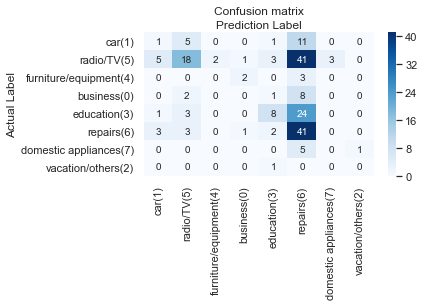

In [45]:
clf_poly = svm.SVC(kernel='poly', degree=8)
clf_poly.fit(X_train, y_train)
y_predict_poly = clf_poly.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict_poly, labels=[0,1,2,3,4,5,6,7])
plot_confusion_matrix_adjust(cnf_matrix, classes=['car(1)','radio/TV(5)','furniture/equipment(4)','business(0)','education(3)','repairs(6)','domestic appliances(7)','vacation/others(2)'],normalize= False,title='Confusion matrix')
print('F1_Score', f1_score(y_test, y_predict_poly, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict_poly))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_poly))
print("Precision:",metrics.precision_score(y_test, y_predict_poly, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predict_poly, average='weighted'))
#print (classification_report(y_test, y_predict_poly))